<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#Unsupervised-clustering-CBTN-dataset" data-toc-modified-id="Unsupervised-clustering-CBTN-dataset-5">Unsupervised clustering CBTN dataset</a></span><ul class="toc-item"><li><span><a href="#Clustering-based-on-top-1000-most-variable-genes" data-toc-modified-id="Clustering-based-on-top-1000-most-variable-genes-5.1">Clustering based on top 1000 most variable genes</a></span></li></ul></li><li><span><a href="#Post-clustering" data-toc-modified-id="Post-clustering-6">Post clustering</a></span></li><li><span><a href="#Clustering-CBTTC-MB" data-toc-modified-id="Clustering-CBTTC-MB-7">Clustering CBTTC MB</a></span><ul class="toc-item"><li><span><a href="#Assign-MB_subgroups-based-on-clustering-information" data-toc-modified-id="Assign-MB_subgroups-based-on-clustering-information-7.1">Assign MB_subgroups based on clustering information</a></span></li></ul></li><li><span><a href="#Clustering-CBTTC-ATRT" data-toc-modified-id="Clustering-CBTTC-ATRT-8">Clustering CBTTC ATRT</a></span><ul class="toc-item"><li><span><a href="#Assign-ATRT_subgroups-based-on-clustering-information" data-toc-modified-id="Assign-ATRT_subgroups-based-on-clustering-information-8.1">Assign ATRT_subgroups based on clustering information</a></span></li></ul></li></ul></div>

# Dependencies

In [12]:
library(circlize)
library(ComplexHeatmap)

# Functions

In [13]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")
source("~/OneDrive - UHN/R_src/color_schemes.R")

# Paths

In [14]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [15]:
load(file = paste0(datapath, "/ESTIMATE/estimate_manifest_primary_clean.RData"))

In [16]:
table(estimate_manifest_primary_clean$group)


  CBTN   ICGC TARGET   TCGA 
   632    196    149   2452 

In [17]:
table(estimate_manifest_primary_clean$vital_status)


   0    1 
1502 1848 

In [18]:
load(paste0(datapath, "exp_mat/tpm_matrix_ped_primary_dedup.RData"))   

# Unsupervised clustering CBTN dataset


## Clustering based on top 1000 most variable genes

In [19]:
cbtn <- estimate_manifest_primary_clean[estimate_manifest_primary_clean$group == "CBTN",]

In [20]:
dim(cbtn)

[1] 632  21

Remove ATRT and ETMR cohort as we are sure of annotations (see cohort_cleanup nb). Remove NBL

In [10]:
cbtn <- cbtn[cbtn$cohort != "ATRT" & cbtn$cohort != "ETMR" & cbtn$cohort != "NBL",]

In [11]:
dim(cbtn)

[1] 607  21

In [12]:
table(cbtn$cohort)


    CP    CPH    EPN     MB    MNG    NFB pedHGG pedLGG   SCHW 
    18     30     72    105     15     13     73    267     14 

In [13]:
exp_subset <- tpm_matrix_ped[,colnames(tpm_matrix_ped) %in% cbtn$sample_id]

In [14]:
dim(exp_subset)

[1] 20105   607

In [15]:
head(exp_subset)

,7316-1926,7316-489,7316-13,7316-3936,7316-873,7316-2669,7316-1928,7316-1655,7316-2251,7316-2622,⋯,7316-2144,7316-884,7316-3052,7316-974,7316-2183,7316-2589,7316-395,7316-775,7316-96,7316-1750
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,8.66,6.15,0.73,1.50,29.41,4.62,6.65,1.78,23.07,0.82,⋯,0.97,7.15,6.17,7.37,17.13,2.36,2.76,3.04,5.81,2.59
TNMD,0.02,0.03,0.02,0.01,0.33,0.03,0.07,0.01,0.02,0.00,⋯,0.00,0.00,0.03,0.00,0.50,0.00,0.02,0.00,0.01,0.01
DPM1,6.15,5.09,1.09,3.68,4.89,4.75,3.07,4.58,5.40,0.78,⋯,0.34,4.68,5.59,6.44,8.79,2.26,2.37,2.58,7.43,3.14
SCYL3,1.75,1.71,0.44,1.44,1.52,1.61,1.01,1.18,1.13,0.13,⋯,0.09,0.81,2.15,1.77,2.33,0.65,0.68,1.52,2.62,1.40
C1orf112,1.12,2.78,0.43,0.71,1.00,1.64,0.58,1.61,0.74,0.25,⋯,0.04,0.62,1.36,1.69,1.30,0.45,0.50,0.82,1.69,1.08
FGR,0.90,0.18,0.36,1.32,0.93,1.01,0.83,0.09,0.46,0.40,⋯,0.05,1.33,0.43,1.42,3.23,0.36,3.15,0.19,0.53,1.54


Log transform, median center

In [16]:
exp_subset_log2 <- log2(exp_subset + 1) 
rowmed <- apply(exp_subset_log2,1,median)
exp_subset_rowcenter <- exp_subset_log2 - rowmed

Get top 1000 highly variable genes

In [17]:
tpmVar <- apply(exp_subset_rowcenter, 1, var)
highVar1000 <- order(tpmVar, decreasing=TRUE)[1:1000]
top1000diffgenes <- exp_subset_rowcenter[highVar1000,]

In [18]:
set.seed(777)

In [19]:
clustering_heatmap_top1000 = Heatmap(as.matrix(t(top1000diffgenes)),
                                          #titles and names                          
                                         name = "Correlation",
                                         show_row_names = TRUE,
                                         show_column_names = FALSE,    
                                         #clusters  
                                         cluster_columns = TRUE,
                                         clustering_distance_rows = "pearson",
                                         clustering_method_rows = "ward.D",
                                         clustering_distance_columns = "pearson",
                                         clustering_method_columns = "ward.D",  
                                         cluster_rows = TRUE,
                                         row_dend_reorder = FALSE,
                                         column_dend_reorder = FALSE,
                                         #aesthestics
                                         row_names_gp = gpar(fontsize = 10),
                                         column_title_gp = gpar(fontsize = 10),
                                         row_title = NULL,
                                         show_heatmap_legend = FALSE,
                                         row_dend_width = unit(5, "cm"))

In [20]:
length(cbtn$sample_id)

[1] 607

Matrix to hold cancer types

In [21]:
cohort_mat_ped <- matrix(ncol = 9, nrow = 607)
rownames(cohort_mat_ped) <- cbtn$sample_id
colnames(cohort_mat_ped) <- c('CP', "pedLGG", "SCHW", "MB",'EPN', 'pedHGG', 'MNG', 'NFB', 'CPH')

In [22]:
for(i in 1:nrow(cohort_mat_ped)){
    cohort_mat_ped[i,colnames(cohort_mat_ped) == cbtn$cohort[i]] <- as.character(cbtn$cohort[i])
}

cohort_mat_ped_ordered <- cohort_mat_ped[colnames(exp_subset),]

In [23]:
ht_cohorts_ped = Heatmap(cohort_mat_ped_ordered,
                         #titles and names
                         name = "Cancer type",
                         show_row_names = TRUE,
                         show_column_names = TRUE,    
                         #clusters
                         cluster_columns = FALSE,
                         cluster_rows = FALSE,
                         #aesthestics
                         col = cohort_col,
                         na_col = "#ffffff",
                         row_names_gp = gpar(fontsize = 2),
                         column_names_gp = gpar(fontsize = 10),
                         column_title_gp = gpar(fontsize = 10),
                         row_title = NULL,
                         width = unit(7,"cm"),
                         #Legend
                         show_heatmap_legend = FALSE)

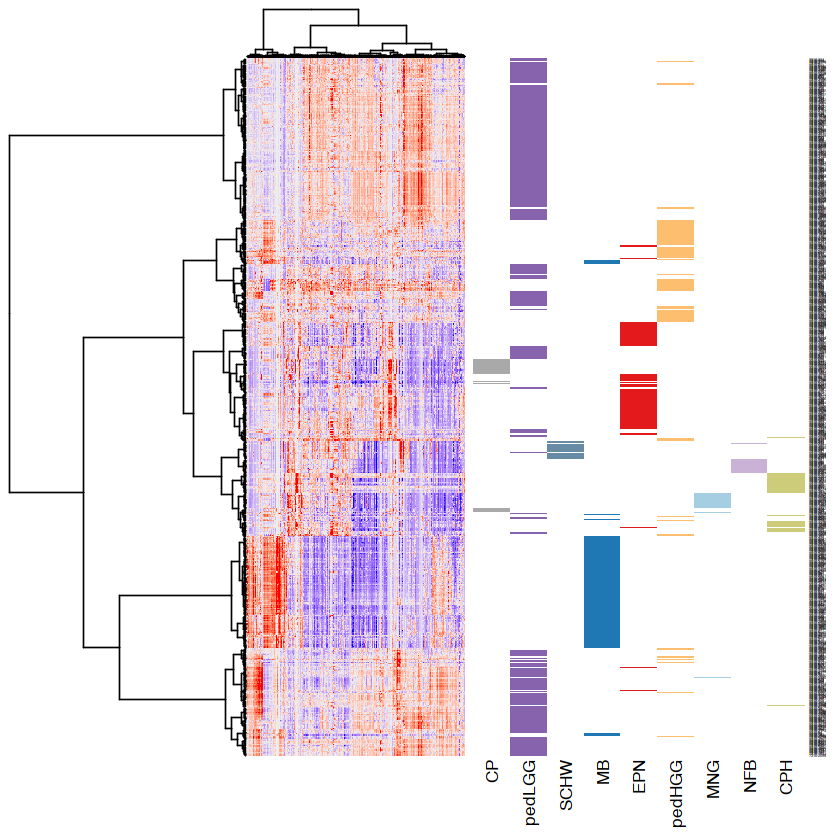

In [24]:
clustering_heatmap_top1000 + ht_cohorts_ped

In [25]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_pear_top1000_dend.pdf"),
        width = 15, height = 15,useDingbats = F)
    draw(clustering_heatmap_top1000 + ht_cohorts_ped)
dev.off()

pdf 
  2

Rasterize

In [28]:
ht_cohorts_ped = Heatmap(cohort_mat_ped_ordered,
                         #titles and names
                         name = "Cancer type",
                         show_row_names = FALSE,
                         show_column_names = TRUE,    
                         #clusters
                         cluster_columns = TRUE,
                         cluster_rows = FALSE,
                         #aesthestics
                         col = cohort_col,
                         na_col = "#ffffff",
                         row_names_gp = gpar(fontsize = 2),
                         column_names_gp = gpar(fontsize = 10),
                         column_title_gp = gpar(fontsize = 10),
                         row_title = NULL,
                         width = unit(7,"cm"),
                         #Legend
                         show_heatmap_legend = FALSE)

clustering_heatmap_top1000 = Heatmap(as.matrix(t(top1000diffgenes)),
                                          #titles and names                          
                                         name = "Correlation",
                                         show_row_names = FALSE,
                                         show_column_names = FALSE,    
                                         #clusters  
                                         cluster_columns = TRUE,
                                         clustering_distance_rows = "pearson",
                                         clustering_method_rows = "ward.D",
                                         clustering_distance_columns = "pearson",
                                         clustering_method_columns = "ward.D",  
                                         cluster_rows = TRUE,
                                         row_dend_reorder = FALSE,
                                         column_dend_reorder = FALSE,
                                         #aesthestics
                                         row_names_gp = gpar(fontsize = 10),
                                         column_title_gp = gpar(fontsize = 10),
                                         row_title = NULL,
                                         show_heatmap_legend = FALSE,
                                         row_dend_width = unit(5, "cm"),
                                         use_raster = TRUE, raster_device = "tiff")

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [29]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_pear_top1000_dend_raster.pdf"),
        width = 15, height = 15,useDingbats = F)
    draw(clustering_heatmap_top1000 + ht_cohorts_ped)
dev.off()

pdf 
  2

Samples to remove based on unsupervised clustering

In [30]:
cbtn_samplesrm <- c(
'7316-2176',
'7316-3922',
'7316-204',
'7316-624',
'7316-214',
'7316-851',
'7316-2158',
'7316-2106',
'7316-2134',
'7316-373',
'7316-182',
'7316-2626',
'7316-2703',
'7316-740',
'7316-167',
'7316-2249',
'7316-1969',
'7316-259',
'7316-1106',
'7316-1187',
'7316-220',
'7316-2251',
'7316-3040',
'7316-176',
'7316-223',
'7316-1946',
'7316-2988',
'7316-1943',
'7316-3513',
'7316-2079',
'7316-1799',
'7316-1095',
'7316-2591',
'7316-395',
'7316-2984',
'7316-234',
'7316-96',
'7316-2664',
'7316-3300',
'7316-204',
'7316-2809',
'7316-2899',
'7316-3202',
'7316-2673',
'7316-3935',
'7316-2255',
'7316-229',
'7316-968',
'7316-1746',
'7316-272',
'7316-1676',
'7316-1666')

In [31]:
length(cbtn_samplesrm)

[1] 52

In [32]:
tmp <- estimate_manifest_primary_clean[estimate_manifest_primary_clean$sample_id %in% cbtn_samplesrm,]

In [33]:
estimate_manifest_primary_clean <- estimate_manifest_primary_clean[!estimate_manifest_primary_clean$sample_id %in% cbtn_samplesrm,]

In [34]:
dim(estimate_manifest_primary_clean)

[1] 3378   21

In [35]:
save(estimate_manifest_primary_clean,
         file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_postclustering.RData"))   

# Post clustering

In [36]:
cbtn_postcleanup <- estimate_manifest_primary_clean[estimate_manifest_primary_clean$group == "CBTN",]

In [37]:
dim(cbtn_postcleanup)

[1] 581  21

Remove ATRT and ETMR cohort as we are sure of annotations (see cohort_cleanup nb) and NBL

In [38]:
cbtn_postcleanup <- cbtn_postcleanup[cbtn_postcleanup$cohort != "ATRT" & 
                                     cbtn_postcleanup$cohort != "ETMR" &
                                     cbtn_postcleanup$cohort != "NBL",]

In [39]:
table(cbtn_postcleanup$cohort)


    CP    CPH    EPN     MB    MNG    NFB pedHGG pedLGG   SCHW 
    16     27     65     97     13     11     61    252     14 

In [40]:
exp_subset_pc <- tpm_matrix_ped[,colnames(tpm_matrix_ped) %in% cbtn_postcleanup$sample_id]

In [41]:
exp_subset_pc_log2 <- log2(exp_subset_pc + 1) 
rowmed_pc <- apply(exp_subset_pc_log2,1,median)
exp_subset_pc_rowcenter <- exp_subset_pc_log2 - rowmed_pc

In [42]:
tpmVar_pc <- apply(exp_subset_pc_rowcenter, 1, var)
highVar1000_pc <- order(tpmVar_pc, decreasing=TRUE)[1:1000]
top1000diffgenes_pc <- exp_subset_pc_rowcenter[highVar1000_pc,]

In [43]:
clustering_heatmap_top1000_pc = Heatmap(as.matrix(t(top1000diffgenes_pc)),
                                        #titles and names                          
                                         name = "Correlation",
                                         show_row_names = TRUE,
                                         show_column_names = FALSE,    
                                         #clusters  
                                         cluster_columns = TRUE,
                                         clustering_distance_rows = "pearson",
                                         clustering_method_rows = "ward.D",
                                         clustering_distance_columns = "pearson",
                                         clustering_method_columns = "ward.D",  
                                         cluster_rows = TRUE,
                                         row_dend_reorder = FALSE,
                                         column_dend_reorder = FALSE,
                                         #aesthestics
                                         row_names_gp = gpar(fontsize = 10),
                                         column_title_gp = gpar(fontsize = 10),
                                         row_title = NULL,
                                         show_heatmap_legend = FALSE,
                                         row_dend_width = unit(5, "cm"))

Cohort heatmap, post clustering cleanup

In [44]:
length(cbtn_postcleanup$sample_id)

[1] 556

In [45]:
cohort_mat_ped_pc <- matrix(ncol = 9, nrow = 556)
rownames(cohort_mat_ped_pc) <- cbtn_postcleanup$sample_id
colnames(cohort_mat_ped_pc) <- c('CP', "pedLGG", "SCHW", "MB",'EPN', 'pedHGG', 'MNG', 'NFB', 'CPH')

In [46]:
for(i in 1:nrow(cohort_mat_ped_pc)){
    cohort_mat_ped_pc[i,colnames(cohort_mat_ped_pc) == cbtn_postcleanup$cohort[i]] <- as.character(cbtn_postcleanup$cohort[i])
}

cohort_mat_ped_pc_ordered <- cohort_mat_ped_pc[colnames(exp_subset_pc),]

In [47]:
ht_cohorts_ped_pc = Heatmap(cohort_mat_ped_pc_ordered,
                            #titles and names
                            name = "Cancer type",
                            show_row_names = TRUE,
                            show_column_names = TRUE,    
                            #clusters
                            cluster_columns = FALSE,
                            cluster_rows = FALSE,
                            #aesthestics
                            col = cohort_col,
                            na_col = "#ffffff",
                            row_names_gp = gpar(fontsize = 2),
                            column_names_gp = gpar(fontsize = 10),
                            column_title_gp = gpar(fontsize = 10),
                            row_title = NULL,
                            width = unit(7,"cm"),
                            #Legend
                            show_heatmap_legend = FALSE)

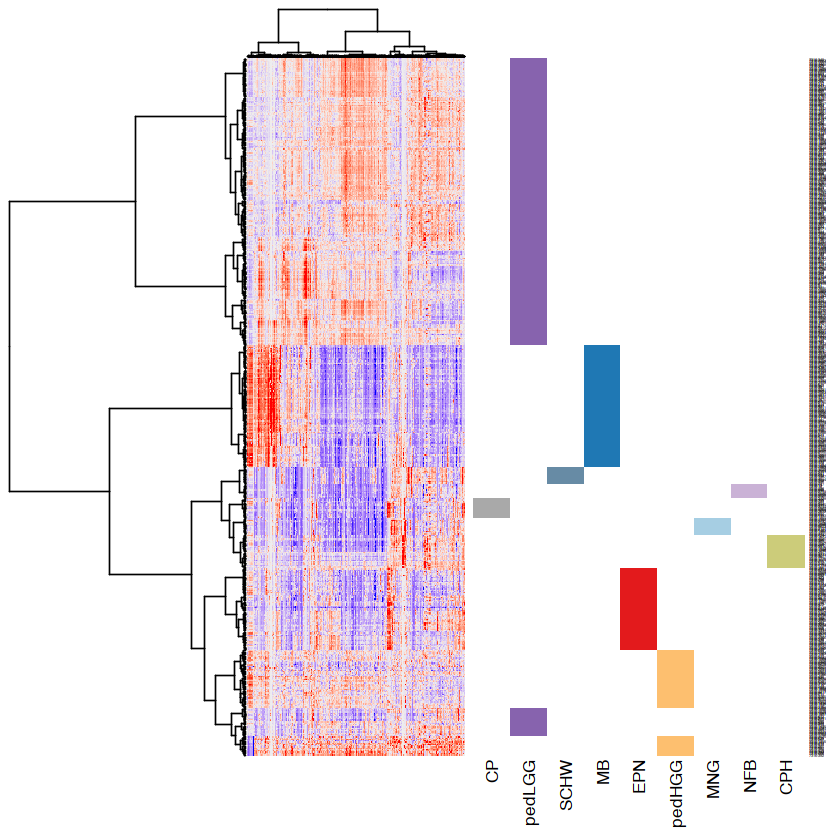

In [48]:
draw(clustering_heatmap_top1000_pc + ht_cohorts_ped_pc)

In [49]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_pear_top1000_dend_postclustering.pdf"),
    width = 15, height = 15,useDingbats = F)
draw(clustering_heatmap_top1000_pc + ht_cohorts_ped_pc)
dev.off()

pdf 
  2

rasterize

In [50]:
ht_cohorts_ped_pc = Heatmap(cohort_mat_ped_pc_ordered,
                            #titles and names
                            name = "Cancer type",
                            show_row_names = FALSE,
                            show_column_names = TRUE,    
                            #clusters
                            cluster_columns = FALSE,
                            cluster_rows = FALSE,
                            #aesthestics
                            col = cohort_col,
                            na_col = "#ffffff",
                            row_names_gp = gpar(fontsize = 2),
                            column_names_gp = gpar(fontsize = 10),
                            column_title_gp = gpar(fontsize = 10),
                            row_title = NULL,
                            width = unit(7,"cm"),
                            #Legend
                            show_heatmap_legend = FALSE)

clustering_heatmap_top1000_pc = Heatmap(as.matrix(t(top1000diffgenes_pc)),
                                        #titles and names                          
                                         name = "Correlation",
                                         show_row_names = TRUE,
                                         show_column_names = FALSE,    
                                         #clusters  
                                         cluster_columns = TRUE,
                                         clustering_distance_rows = "pearson",
                                         clustering_method_rows = "ward.D",
                                         clustering_distance_columns = "pearson",
                                         clustering_method_columns = "ward.D",  
                                         cluster_rows = TRUE,
                                         row_dend_reorder = FALSE,
                                         column_dend_reorder = FALSE,
                                         #aesthestics
                                         row_names_gp = gpar(fontsize = 10),
                                         column_title_gp = gpar(fontsize = 10),
                                         row_title = NULL,
                                         show_heatmap_legend = FALSE,
                                         row_dend_width = unit(5, "cm"),
                                       use_raster = TRUE, raster_device = "tiff")

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [51]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_pear_top1000_dend_postclustering_raster.pdf"),
    width = 15, height = 15,useDingbats = F)
draw(clustering_heatmap_top1000_pc + ht_cohorts_ped_pc)
dev.off()

pdf 
  2

# Clustering CBTTC MB

In [52]:
cbtn_cleanup <- cbtn[!cbtn$sample_id %in% cbtn_samplesrm,]

In [53]:
cbtn_mb <- cbtn_cleanup[cbtn_cleanup$cohort == "MB",]

In [54]:
dim(cbtn_mb)

[1] 97 21

In [55]:
exp_subset_cbtnmb <- tpm_matrix_ped[,colnames(tpm_matrix_ped) %in% cbtn_mb$sample_id]

In [56]:
dim(exp_subset_cbtnmb)

[1] 20105    97

In [57]:
exp_cbtnmb_log2 <- log2(exp_subset_cbtnmb + 1) 
rowmed <- apply(exp_cbtnmb_log2,1,median)
exp_cbtnmb_rowcenter <- exp_cbtnmb_log2 - rowmed   
    
tpmVar <- apply(exp_cbtnmb_rowcenter, 1, var)
highVar1000 <- order(tpmVar, decreasing=TRUE)[1:1000]
top1000diffgenes_mb <- exp_cbtnmb_rowcenter[highVar1000,]

In [58]:
clustering_heatmap_top1000_cbtnmb = Heatmap(as.matrix(t(top1000diffgenes_mb)),
                                             #titles and names                          
                                             name = "Correlation",
                                             show_row_names = TRUE,
                                             show_column_names = FALSE,    
                                             #clusters  
                                             cluster_columns = TRUE,
                                             clustering_distance_rows = "pearson",
                                             clustering_method_rows = "ward.D",
                                             clustering_distance_columns = "pearson",
                                             clustering_method_columns = "ward.D",  
                                             cluster_rows = TRUE,
                                             row_dend_reorder = FALSE,
                                             column_dend_reorder = FALSE,
                                             #aesthestics
                                             row_names_gp = gpar(fontsize = 10),
                                             column_title_gp = gpar(fontsize = 10),
                                             row_title = NULL,
                                             show_heatmap_legend = FALSE,
                                             row_dend_width = unit(5, "cm"))

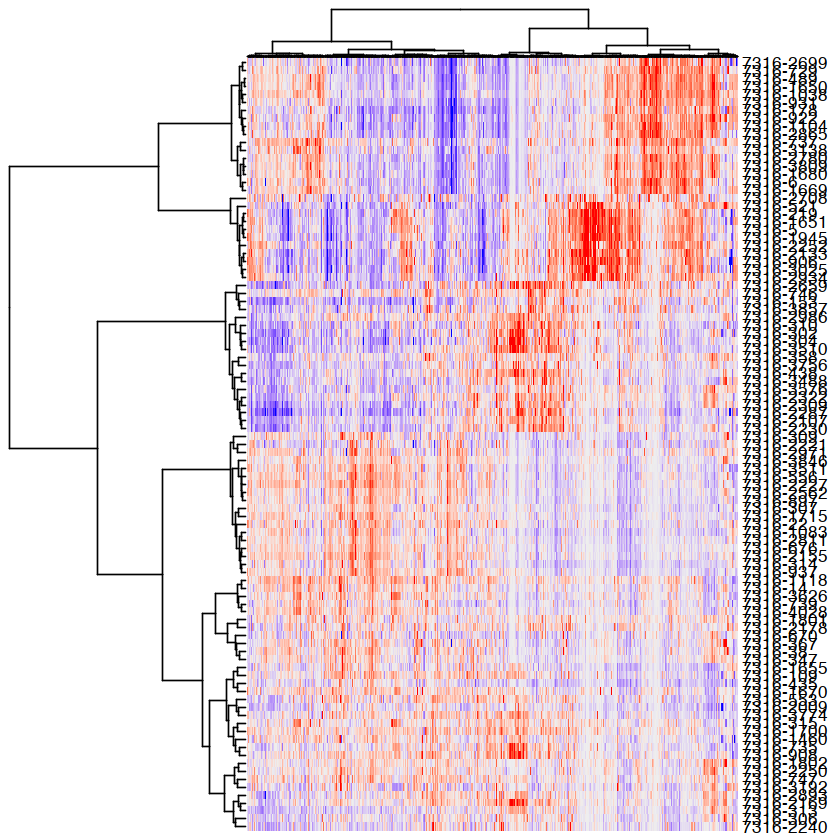

In [59]:
clustering_heatmap_top1000_cbtnmb

In [60]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_MB_pear_top1000.pdf"),
    width = 15, height = 15,useDingbats = F)
print(clustering_heatmap_top1000_cbtnmb)
dev.off()

pdf 
  2

Rasterize

In [61]:
clustering_heatmap_top1000_cbtnmb = Heatmap(as.matrix(t(top1000diffgenes_mb)),
                                             #titles and names                          
                                             name = "Correlation",
                                             show_row_names = TRUE,
                                             show_column_names = FALSE,    
                                             #clusters  
                                             cluster_columns = TRUE,
                                             clustering_distance_rows = "pearson",
                                             clustering_method_rows = "ward.D",
                                             clustering_distance_columns = "pearson",
                                             clustering_method_columns = "ward.D",  
                                             cluster_rows = TRUE,
                                             row_dend_reorder = FALSE,
                                             column_dend_reorder = FALSE,
                                             #aesthestics
                                             row_names_gp = gpar(fontsize = 10),
                                             column_title_gp = gpar(fontsize = 10),
                                             row_title = NULL,
                                             show_heatmap_legend = FALSE,
                                             row_dend_width = unit(5, "cm"),
                                           use_raster = TRUE, raster_device = "tiff")

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [62]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_MB_pear_top1000_raster.pdf"),
    width = 15, height = 15,useDingbats = F)
print(clustering_heatmap_top1000_cbtnmb)
dev.off()

pdf 
  2

## Assign MB_subgroups based on clustering information

In [63]:
WNT_sampleIDs <- c(
"7316-521",
"7316-219",
"7316-1945",
"7316-1651",
"7316-5",
"7316-2252",
"7316-2133",
"7316-906",
"7316-2934",
"7316-3025",
"7316-2708")

In [64]:
SHH_sampleIDs <- c(
"7316-931",
"7316-3138",
"7316-1669",
"7316-6",
"7316-737",
"7316-1680",
"7316-3809",
"7316-2699",
"7316-729",
"7316-922",
"7316-178",
"7316-1104",
"7316-2865",
"7316-1038",
"7316-2780",
"7316-1650",
"7316-489")

In [65]:
Gr34_sampleIDs <- cbtn_mb$sample_id[!cbtn_mb$sample_id %in% c(SHH_sampleIDs, WNT_sampleIDs)]

In [66]:
estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% Gr34_sampleIDs] <- "MB_GR34"

In [67]:
estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% SHH_sampleIDs] <- "MB_SHH"

In [68]:
estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% WNT_sampleIDs] <- "MB_WNT"

# Clustering CBTTC ATRT

In [69]:
cbtn <- estimate_manifest_primary_clean[estimate_manifest_primary_clean$group == "CBTN",]

In [70]:
atrts <- cbtn[cbtn$cohort == "ATRT",]

In [71]:
dim(atrts)

[1] 21 21

In [72]:
exp_subset_cbtnatrt <- tpm_matrix_ped[,colnames(tpm_matrix_ped) %in% atrts$sample_id]

In [73]:
dim(exp_subset_cbtnatrt)

[1] 20105    21

In [74]:
exp_cbtnatrt_log2 <- log2(exp_subset_cbtnatrt + 1) 
rowmed <- apply(exp_cbtnatrt_log2,1,median)
exp_cbtnatrt_rowcenter <- exp_cbtnatrt_log2 - rowmed   
    
tpmVar <- apply(exp_cbtnatrt_rowcenter, 1, var)
highVar1000 <- order(tpmVar, decreasing=TRUE)[1:1000]
top1000diffgenes_atrt <- exp_cbtnatrt_rowcenter[highVar1000,]

In [75]:
clustering_heatmap_top1000_atrt = Heatmap(as.matrix(t(top1000diffgenes_atrt)),
                                          #titles and names                          
                                          name = "Correlation",
                                          show_row_names = TRUE,
                                          show_column_names = FALSE,    
                                          #clusters  
                                          cluster_columns = TRUE,
                                          clustering_distance_rows = "pearson",
                                          clustering_method_rows = "ward.D",
                                          clustering_distance_columns = "pearson",
                                          clustering_method_columns = "ward.D",  
                                          cluster_rows = TRUE,
                                          row_dend_reorder = FALSE,
                                          column_dend_reorder = FALSE,
                                          #aesthestics
                                          row_names_gp = gpar(fontsize = 10),
                                          column_title_gp = gpar(fontsize = 10),
                                          row_title = NULL, height = unit(10,"cm"),
                                          show_heatmap_legend = FALSE,
                                          row_dend_width = unit(5, "cm"))

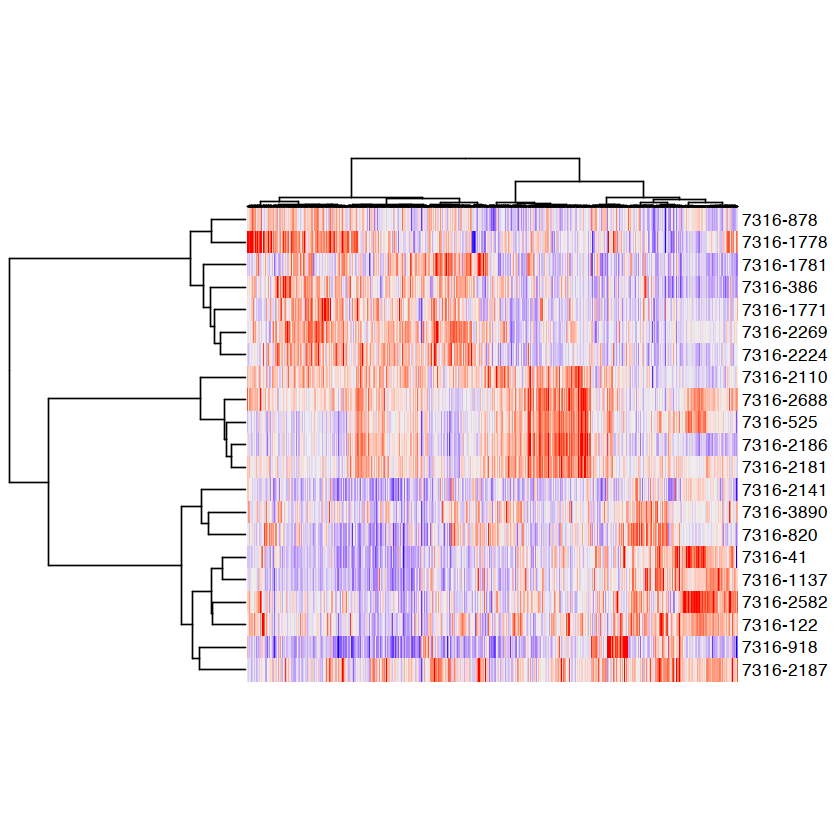

In [76]:
clustering_heatmap_top1000_atrt

In [77]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_ATRT_pear_top1000.pdf"),
    width = 15, height = 15,useDingbats = F)
print(clustering_heatmap_top1000_atrt)
dev.off()

pdf 
  2

Rasterize

In [78]:
clustering_heatmap_top1000_atrt = Heatmap(as.matrix(t(top1000diffgenes_atrt)),
                                          #titles and names                          
                                          name = "Correlation",
                                          show_row_names = TRUE,
                                          show_column_names = FALSE,    
                                          #clusters  
                                          cluster_columns = TRUE,
                                          clustering_distance_rows = "pearson",
                                          clustering_method_rows = "ward.D",
                                          clustering_distance_columns = "pearson",
                                          clustering_method_columns = "ward.D",  
                                          cluster_rows = TRUE,
                                          row_dend_reorder = FALSE,
                                          column_dend_reorder = FALSE,
                                          #aesthestics
                                          row_names_gp = gpar(fontsize = 10),
                                          column_title_gp = gpar(fontsize = 10),
                                          row_title = NULL, height = unit(10,"cm"),
                                          show_heatmap_legend = FALSE,
                                          row_dend_width = unit(5, "cm"),
                                         use_raster = TRUE, raster_device = "tiff")

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



In [80]:
pdf(file = paste0(plotpath,"heatmap_cor_CBTTC_ATRT_pear_top1000_raster.pdf"),
    width = 15, height = 15,useDingbats = F)
print(clustering_heatmap_top1000_atrt)
dev.off()

pdf 
  2

## Assign ATRT_subgroups based on clustering information

judging based on Pengbo's original analysis. see emails

In [70]:
MYC_sampleIDs <- c("7316-1137", "7316-122", "7316-2141", "7316-2187", "7316-2582", 
                   "7316-3890", "7316-41", "7316-918", "7316-820")

In [71]:
TYR_sampleIDs <- c("7316-2110","7316-2181", "7316-2186", "7316-2688", "7316-525")

In [72]:
SHH_sampleIDs <- c("7316-2224", "7316-2269", "7316-386", "7316-1781", "7316-878", "7316-1771", "7316-1778")

In [73]:
estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% MYC_sampleIDs] <- "ATRT_MYC"

estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% TYR_sampleIDs] <- "ATRT_TYR"

estimate_manifest_primary_clean$disease_type[estimate_manifest_primary_clean$sample_id %in% SHH_sampleIDs] <- "ATRT_SHH"

In [74]:
save(estimate_manifest_primary_clean,
         file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_final.RData"))

In [75]:
write.csv(estimate_manifest_primary_clean,
          file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_final.csv"),
          row.names = F, quote = F)   

In [76]:
table(estimate_manifest_primary_clean$cohort)


  ATRT   COAD     CP    CPH    EPN   ETMR    GBM    LGG   LUAD     MB    MNG 
    31    298     16     27     65      9    153    507    522    208     13 
   NBL    NFB     OV pedHGG pedLGG   PRAD   SCHW   SKCM 
   151     11    373     83    298    497     14    102 

In [78]:
table(estimate_manifest_primary_clean$group)


  CBTN   ICGC TARGET   TCGA 
   581    196    149   2452 